Starting training...
Epoch 0: Error = 0.250030
Epoch 100: Error = 0.238142
Epoch 200: Error = 0.234297
Epoch 300: Error = 0.232897
Epoch 400: Error = 0.232326
Epoch 500: Error = 0.232064
Epoch 600: Error = 0.231927
Epoch 700: Error = 0.231845
Epoch 800: Error = 0.231790
Epoch 900: Error = 0.231749
Training complete.


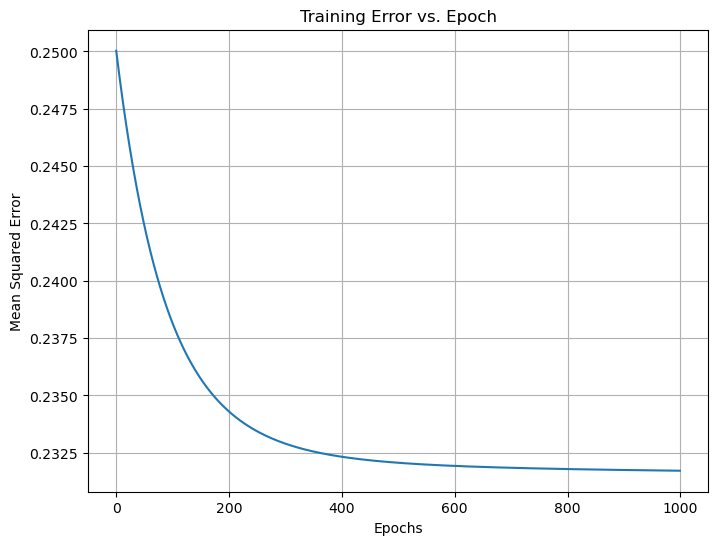

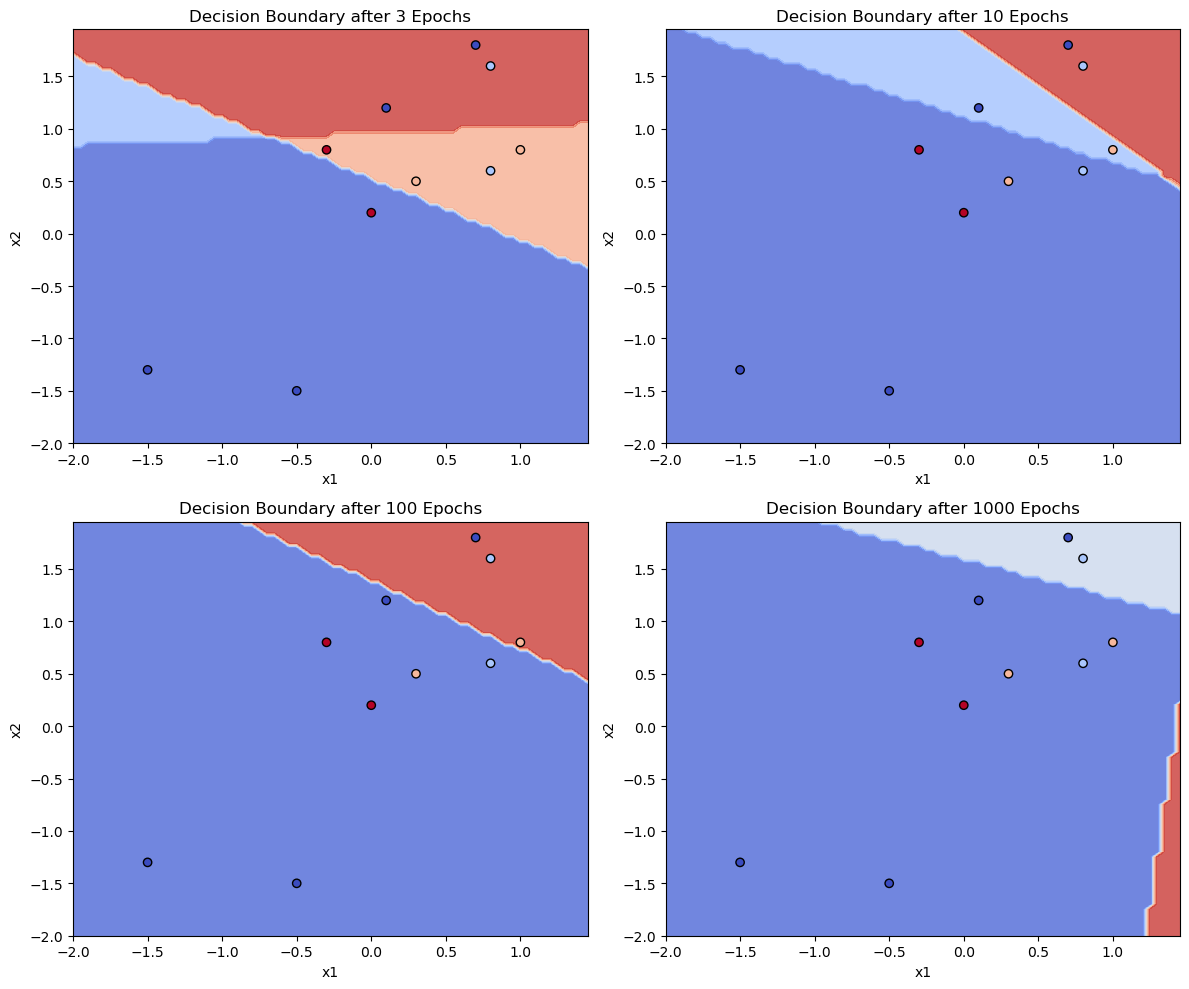

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the input and target data
X = np.array([
    [0.1, 0.7, 0.8, 0.8, 1.0, 0.3, 0.0, -0.3, -0.5, -1.5],
    [1.2, 1.8, 1.6, 0.6, 0.8, 0.5, 0.2, 0.8, -1.5, -1.3]
])
Y = np.array([
    [1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
    [0, 0, 0, 0, 1, 1, 1, 1, 0, 0]
])

# Define binary codes and corresponding group numbers for plotting
groups = {
    (1, 0): 1,
    (0, 0): 2,
    (1, 1): 3,
    (0, 1): 4
}
y_codes = [tuple(col) for col in Y.T]
group_labels = [groups[code] for code in y_codes]

# Define the Sigmoid activation function and its derivative
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(a):
    return a * (1 - a)

## Training the Neural Network

# Hyperparameters
learning_rate = 0.1
epochs = 1000

# Initialize weights and biases
np.random.seed(42) # for reproducibility
W = np.random.randn(2, 2) * 0.01
b = np.zeros((2, 1))

# Lists to store training error
training_errors = []

print("Starting training...")
for epoch in range(epochs):
    # Forward Pass
    Z = np.dot(W, X) + b
    A = sigmoid(Z)

    # Calculate Loss (Mean Squared Error)
    error = np.mean(np.square(A - Y))
    training_errors.append(error)

    # Backward Pass (Backpropagation)
    delta_A = A - Y
    delta_Z = delta_A * sigmoid_derivative(A)

    dW = np.dot(delta_Z, X.T) / X.shape[1]
    db = np.sum(delta_Z, axis=1, keepdims=True) / X.shape[1]

    # Update parameters
    W -= learning_rate * dW
    b -= learning_rate * db

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Error = {error:.6f}")
print("Training complete.")

# --- Plotting Functions ---

def plot_decision_boundary(W, b, title, ax):
    x_min, x_max = -2.0, 1.5
    y_min, y_max = -2.0, 2.0
    h = 0.05
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Classify each point in the meshgrid
    Z_grid = np.dot(W, np.c_[xx.ravel(), yy.ravel()].T) + b
    A_grid = sigmoid(Z_grid)

    # Assign classification based on closest target code
    def classify(output):
        output = tuple(np.round(output))
        if output in groups:
            return groups[output]
        
        # Fallback to closest group if rounding is ambiguous
        distances = {
            (1, 0): np.linalg.norm(output - (1,0)),
            (0, 0): np.linalg.norm(output - (0,0)),
            (1, 1): np.linalg.norm(output - (1,1)),
            (0, 1): np.linalg.norm(output - (0,1))
        }
        closest_group = min(distances, key=distances.get)
        return groups[closest_group]

    Z_classified = np.array([classify(col) for col in A_grid.T]).reshape(xx.shape)
    
    ax.contourf(xx, yy, Z_classified, alpha=0.8, cmap=plt.cm.coolwarm)
    
    # Plot data points
    scatter = ax.scatter(X[0, :], X[1, :], c=group_labels, cmap=plt.cm.coolwarm, edgecolor='k')
    
    ax.set_title(title)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')

## Plotting Results

# 1. Plot training error vs epoch
plt.figure(figsize=(8, 6))
plt.plot(training_errors)
plt.title('Training Error vs. Epoch')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

# 2. Plot decision boundary at different epochs
epochs_to_plot = [3, 10, 100, 1000]
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, epoch in enumerate(epochs_to_plot):
    # Retrain the network up to the specified epoch
    np.random.seed(42)
    W_temp = np.random.randn(2, 2) * 0.01
    b_temp = np.zeros((2, 1))
    
    for _ in range(epoch):
        Z_temp = np.dot(W_temp, X) + b_temp
        A_temp = sigmoid(Z_temp)
        delta_A = A_temp - Y
        delta_Z = delta_A * sigmoid_derivative(A_temp)
        dW = np.dot(delta_Z, X.T) / X.shape[1]
        db = np.sum(delta_Z, axis=1, keepdims=True) / X.shape[1]
        W_temp -= learning_rate * dW
        b_temp -= learning_rate * db

    plot_decision_boundary(W_temp, b_temp, f"Decision Boundary after {epoch} Epochs", axes[i])

plt.tight_layout()
plt.show()